# Exploring the data 
    duplicate data doesnt exist 
    missing values do exist, need to be dealt with according to their data type


In [61]:
# Add data description
print("Project: Loan Approval Prediction")
print("Target Variable: Loan_Status")
print("Data Source: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?resource=download")

# Add basic data dictionary
data_dict = {
    'Loan_ID': 'Unique loan identifier',
    'Gender': 'Applicant gender',
    'Married': 'Marital status',
    # ... etc
}

Project: Loan Approval Prediction
Target Variable: Loan_Status
Data Source: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?resource=download


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.00

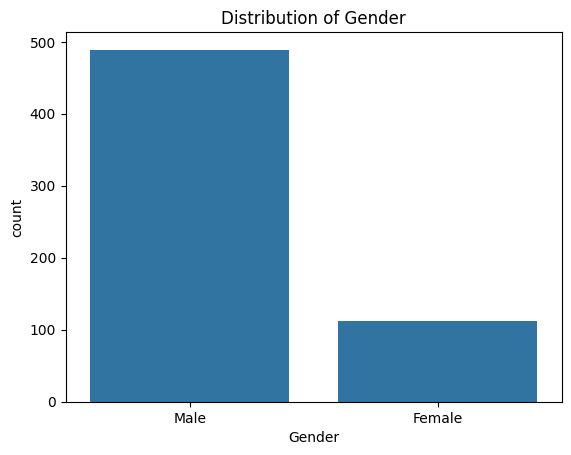

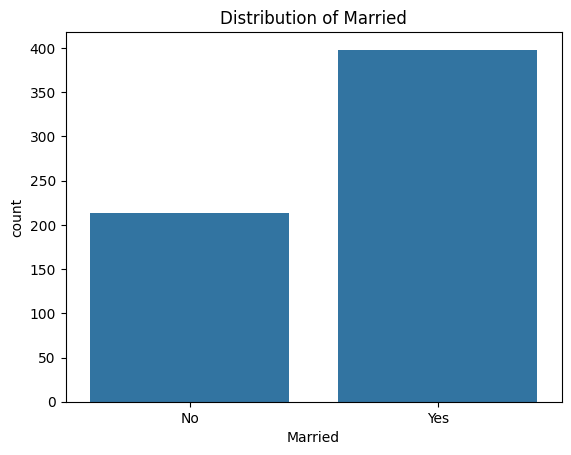

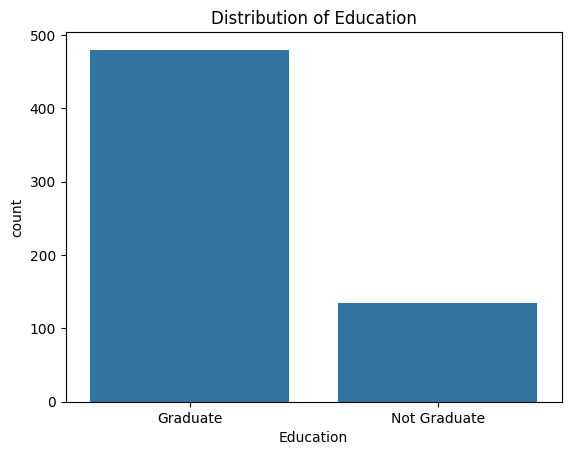

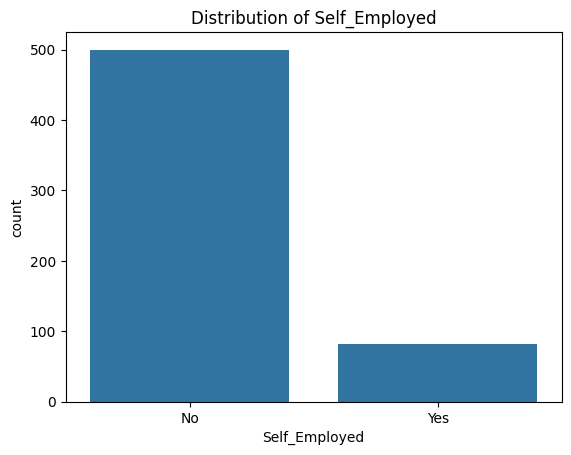

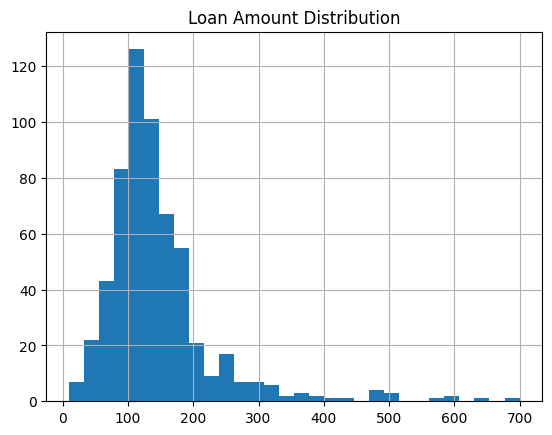

EDA and Cleaning Complete!


C:\Users\livmo\AppData\Local\Temp\ipykernel_19216\669946505.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col] = train_df[col].fillna(train_df[col].mode()[0], inplace=True)
C:\Users\livmo\AppData\Local\Temp\ipykernel_19216\669946505.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Load Data ---
train_df = pd.read_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/train.csv")
test_df = pd.read_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/test.csv")

# --- 3. Initial Inspection ---
train_df.head()
train_df.info()
print(train_df.describe())
print(train_df.isna().sum())

# --- 4. Exploratory Data Analysis (EDA) ---
# Target variable distribution

# Categorical variables distribution example
for col in ['Gender', 'Married', 'Education', 'Self_Employed']:
    sns.countplot(x=col, data=train_df)
    plt.title(f"Distribution of {col}")
    plt.show()

# Numerical variables
train_df['LoanAmount'].hist(bins=30)
plt.title("Loan Amount Distribution")
plt.show()

# --- 5. Handle Missing Values ---
# Categorical
for col in ['Gender', 'Married', 'Self_Employed']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# Numerical
for col in ['LoanAmount', 'Loan_Amount_Term']:
    train_df[col] = train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col] = test_df[col].fillna(test_df[col].median(), inplace=True)

# Credit History
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

# --- 6. Encode Categorical Variables ---
train_df = pd.get_dummies(train_df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# --- 7. Save Cleaned Data ---
train_df.to_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/processed/train_clean.csv", index=False)
test_df.to_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/processed/test_clean.csv", index=False)

print("EDA and Cleaning Complete!")





In [71]:
train_df.head()
train_df.info()
print(train_df.describe())
print(train_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    float64
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Loan_Status        614 non-null    int64  
 7   Property_Area      614 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 38.5 KB
       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  614.000000       614.000000         614.000000  614.000000   
mean     0.744300      5403.459283        1621.245798  145.752443   
std      1.009623      6109.041673        2926.248369   84.107233   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000   

Ensure Correct, Clean Data  

In [72]:
train_df = pd.read_csv("C:/Users/livmo/OneDrive - Trinity College Dublin/LoanPrediction/LoanPrediction/data/processed/df_train_clean.csv")

Visualising target varibale distribution - Loan Status  

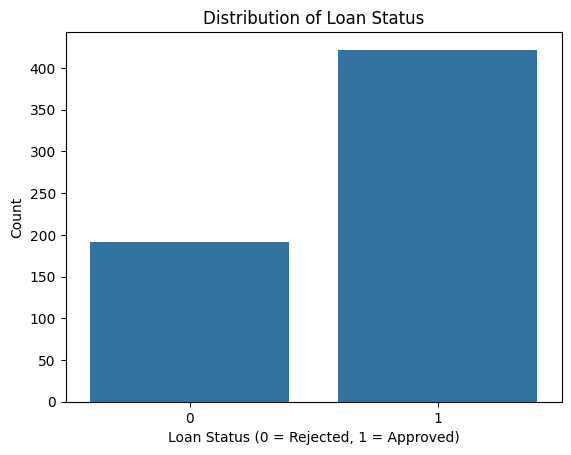

Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64

In [73]:
# Count the number of approvals vs rejections
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Count')
plt.show()

# --- 8. Visualize target variable distribution
train_df['Loan_Status'].value_counts(normalize=True)


Mean and Varience of applicants income and Co aplicants income.

In [74]:
import statistics

app_income_mean = statistics.mean(train_df['ApplicantIncome'])
app_income_varience = statistics.variance(train_df['ApplicantIncome'])

count_highApplicants = 0
count_lowApplicants = 0

for x in range(len(train_df)):
    if (train_df.loc[x, 'ApplicantIncome'] > app_income_mean):
        if (train_df.loc[x, 'Loan_Status'] == 1):
            count_highApplicants += 1
    x += 1

for x in range(len(train_df)):
    if (train_df.loc[x, 'ApplicantIncome'] < app_income_mean) and  (train_df.loc[x, 'Loan_Status'] == 1):
        count_lowApplicants += 1


co_app_income_mean = statistics.mean(train_df['CoapplicantIncome'])
co_app_income_varience = statistics.variance(train_df['CoapplicantIncome'])

print("Applicant Income: \n \tMean:",app_income_mean, "\n\tVariance:", app_income_varience)
print("Coapplicant Income: \n\tMean:",co_app_income_mean, "\n\tVariance:", co_app_income_varience)

print("\nNumber Applicatants OVER mean to recieve loan: ", count_highApplicants)
print("Number Applicatants UNDER mean to recieve loan: ", count_lowApplicants)

Applicant Income: 
 	Mean: 5403.459283387622 
	Variance: 37320390.167181216
Coapplicant Income: 
	Mean: 1621.245798027101 
	Variance: 8562929.518387223

Number Applicatants OVER mean to recieve loan:  121
Number Applicatants UNDER mean to recieve loan:  301


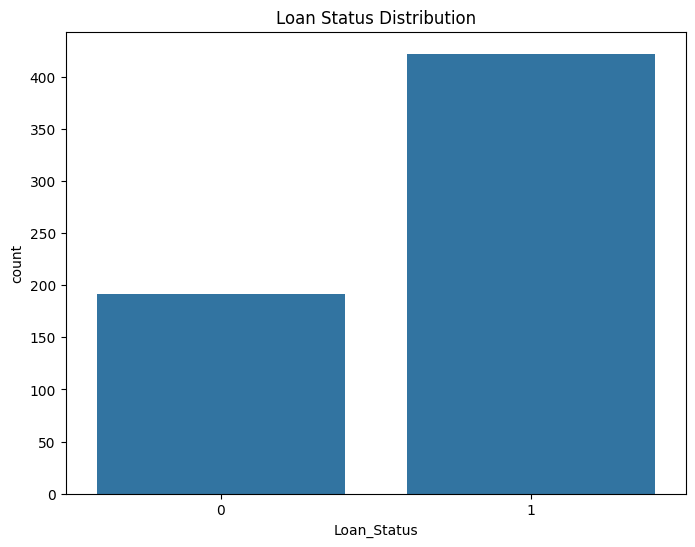

Loan Approval Rate: 68.7%


In [75]:
# Loan_Status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Loan_Status')
plt.title('Loan Status Distribution')
plt.show()

print(f"Loan Approval Rate: {(train_df['Loan_Status'].value_counts(normalize=True)[1]*100):.1f}%")

Correlation Analysis

1. Loan_Amount_Term vs LoanAmount 
 Weak positive
 Larger loans might have longer terms, but not strongly correlated
 Loan_Amount_Term vs Income: Very weak
 Loan term preference varies by individual, not strongly income-dependent


2. Aplicants vs Loan Amount 
 Expected: Moderate to strong POSITIVE correlation (r = 0.4-0.7)
 Interpretation: Higher income applicants tend to request larger loans
 Business logic: People with higher incomes can afford larger loan payments

3. CoapplicantIncome vs LoanAmount
 Expected: Weak to moderate POSITIVE correlation (r = 0.2-0.5)
 Interpretation: Additional household income supports larger loan requests
 Business logic: Combined income increases borrowing capacity


4. ApplicantIncome vs CoapplicantIncome
 Expected: Very weak or NEGATIVE correlation (r = -0.2 to 0.2)
 Interpretation: These incomes are often independent
 Business logic: One spouse working might mean the other doesn't (negative correlation)
 Or no relationship if both work independently


5. Credit_History vs Other Features
 Credit_History vs LoanAmount: Weak correlation
 People with good credit might request larger OR smaller loans
 Credit_History vs Income: Weak correlation  
 Credit history doesn't necessarily correlate with income level

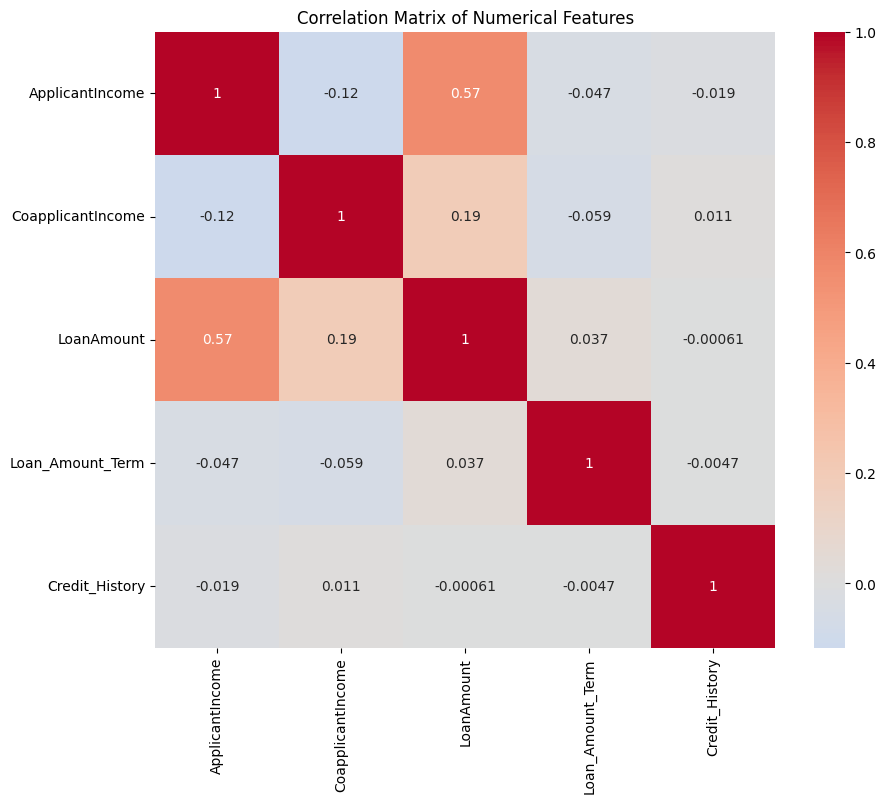

In [76]:
# Numerical features correlation
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
correlation_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [77]:
# After running correlation with target (Loan_Status):
expected_target_correlations = {
    'Credit_History': 'HIGH (0.3-0.6) - Strong predictor of approval',
    'ApplicantIncome': 'LOW-MODERATE (0.1-0.3) - Some predictive power', 
    'CoapplicantIncome': 'LOW (0.0-0.2) - Weak predictor',
    'LoanAmount': 'LOW (0.0-0.2) - Weak direct relationship',
    'Loan_Amount_Term': 'VERY LOW (near 0) - Little predictive value'
}

In [78]:
# Watch for high correlations between FEATURES (not with target)
multicollinearity_risks = {
    ('ApplicantIncome', 'CoapplicantIncome'): 'If r > 0.7, potential issue',
    ('ApplicantIncome', 'LoanAmount'): 'If r > 0.8, might need feature engineering'
}

In [81]:
# Convert target to numerical for correlation
df_numeric = train_df.copy()
df_numeric['Loan_Status'] = df_numeric['Loan_Status']
# Correlation with target
target_correlations = df_numeric[numerical_features + ['Loan_Status']].corr()['Loan_Status'].sort_values(ascending=False)

print("Correlation with Loan Status:")
print(target_correlations)

Correlation with Loan Status:
Loan_Status          1.000000
Credit_History       0.540556
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64


In [82]:
from scipy.stats import pearsonr

def correlation_significance(df, feature1, feature2):
    # Remove missing values
    clean_data = df[[feature1, feature2]].dropna()
    
    if len(clean_data) < 2:
        return None, None
    
    corr, p_value = pearsonr(clean_data[feature1], clean_data[feature2])
    return corr, p_value

# Test specific relationships
relationships = [
    ('ApplicantIncome', 'LoanAmount'), 
    ('Credit_History', 'LoanAmount'),
    ('ApplicantIncome', 'CoapplicantIncome'),
    ('CoapplicantIncome', 'LoanAmount'),
    ('LoanAmount', 'Loan_Amount_Term'),
    ('ApplicantIncome', 'Credit_History')
]

print("Correlation Analysis with Statistical Significance:")
print("=" * 60)

for feat1, feat2 in relationships:
    corr, p_value = correlation_significance(train_df, feat1, feat2)
    
    if corr is not None:
        # Determine significance level
        if p_value < 0.001:
            significance = "***"  # Highly significant
        elif p_value < 0.01:
            significance = "**"   # Very significant
        elif p_value < 0.05:
            significance = "*"    # Significant
        else:
            significance = "ns"   # Not significant
        
        # Interpret correlation strength
        if abs(corr) >= 0.7:
            strength = "Very Strong"
        elif abs(corr) >= 0.5:
            strength = "Strong"
        elif abs(corr) >= 0.3:
            strength = "Moderate"
        elif abs(corr) >= 0.1:
            strength = "Weak"
        else:
            strength = "Very Weak"
        
        # Determine direction
        direction = "Positive" if corr > 0 else "Negative"
        
        print(f"{feat1} vs {feat2}:")
        print(f"  Correlation (r): {corr:.4f}")
        print(f"  p-value: {p_value:.4f} {significance}")
        print(f"  Strength: {strength} {direction}")
        print(f"  Samples used: {len(train_df[[feat1, feat2]].dropna())}")
        print("-" * 40)
    else:
        print(f"{feat1} vs {feat2}: Insufficient data for analysis")
        print("-" * 40)

# Additional: Correlation with target variable (if you have Loan_Status as numeric)
print("\n" + "=" * 60)
print("CORRELATION WITH TARGET VARIABLE (Loan_Status)")
print("=" * 60)

# Convert Loan_Status to numeric for correlation analysis
df_numeric = train_df.copy()
df_numeric['Loan_Status'] = df_numeric['Loan_Status'].map({'Y': 1, 'N': 0})

target_relationships = [
    ('ApplicantIncome', 'Loan_Status'),
    ('CoapplicantIncome', 'Loan_Status'),
    ('LoanAmount', 'Loan_Status'),
    ('Credit_History', 'Loan_Status'),
    ('Loan_Amount_Term', 'Loan_Status')
]

for feat, target in target_relationships:
    corr, p_value = correlation_significance(df_numeric, feat, target)
    
    if corr is not None:
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        
        print(f"{feat} vs Loan_Status: r = {corr:.4f}, p = {p_value:.4f} {significance}")

Correlation Analysis with Statistical Significance:
ApplicantIncome vs LoanAmount:
  Correlation (r): 0.5652
  p-value: 0.0000 ***
  Strength: Strong Positive
  Samples used: 614
----------------------------------------
Credit_History vs LoanAmount:
  Correlation (r): -0.0006
  p-value: 0.9880 ns
  Strength: Very Weak Negative
  Samples used: 614
----------------------------------------
ApplicantIncome vs CoapplicantIncome:
  Correlation (r): -0.1166
  p-value: 0.0038 **
  Strength: Weak Negative
  Samples used: 614
----------------------------------------
CoapplicantIncome vs LoanAmount:
  Correlation (r): 0.1892
  p-value: 0.0000 ***
  Strength: Weak Positive
  Samples used: 614
----------------------------------------
LoanAmount vs Loan_Amount_Term:
  Correlation (r): 0.0370
  p-value: 0.3606 ns
  Strength: Very Weak Positive
  Samples used: 614
----------------------------------------
ApplicantIncome vs Credit_History:
  Correlation (r): -0.0186
  p-value: 0.6452 ns
  Strength: Ver